# Exploratory Data Analysis (EDA) - Ames Housing Dataset

This notebook explores the Ames Housing dataset to understand the features and their relationships with the target variable, `SalePrice`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
%matplotlib inline

# Load the data
df = pd.read_csv('../data/ames_housing.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 1. Basic Information
Let's check the data types and missing values.


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## 2. Target Variable Distribution
Visualizing the distribution of `SalePrice`.


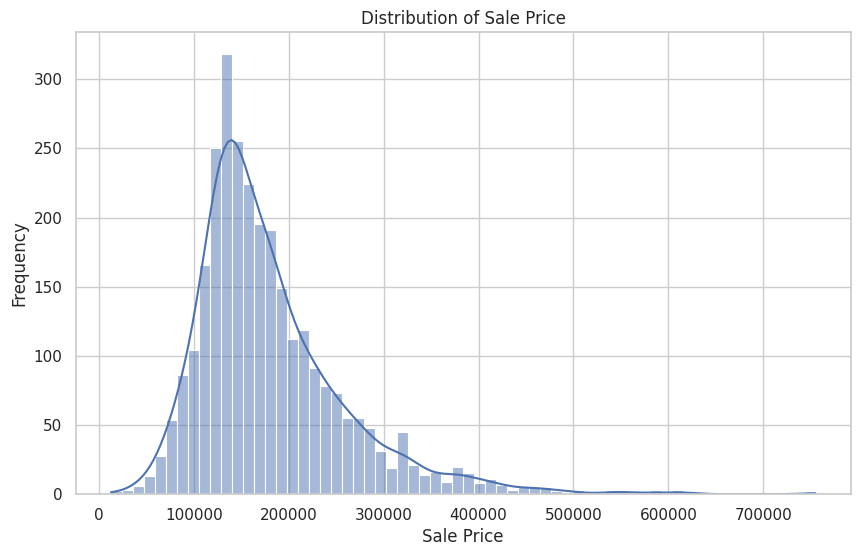

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


## 3. Correlation Heatmap
Checking correlations between numerical features and the target.


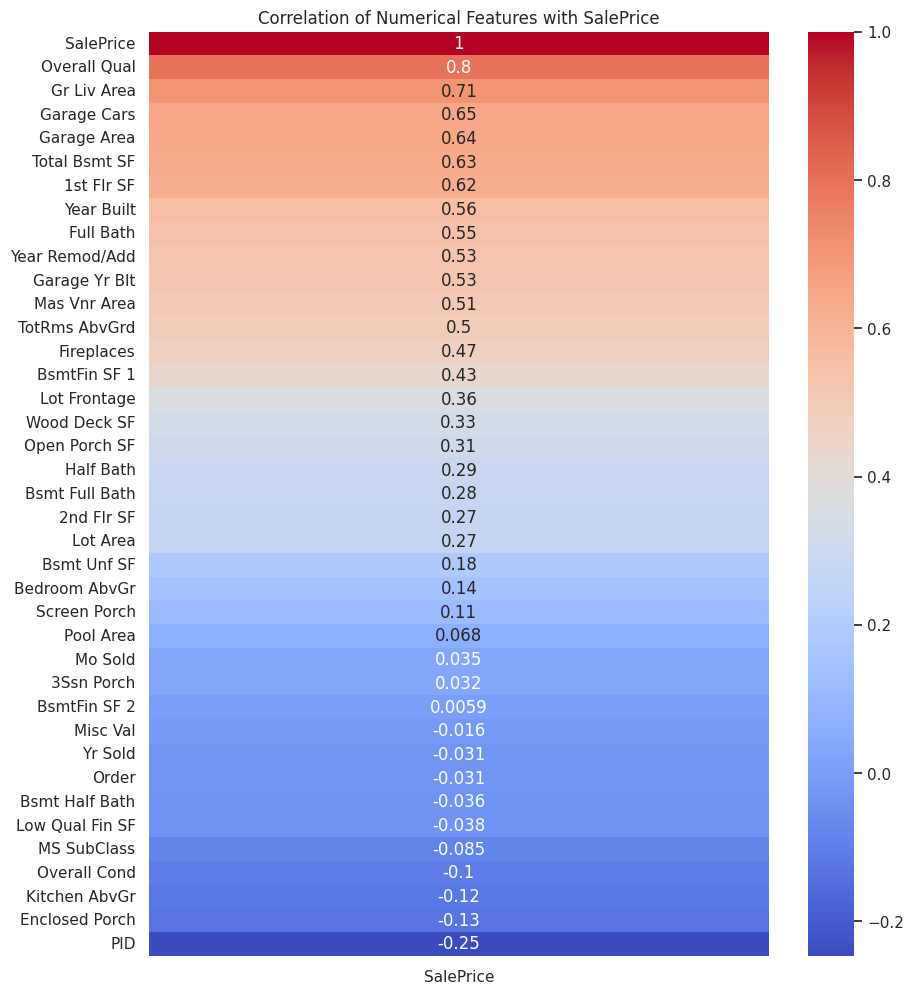

In [4]:
# Select only numerical features for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot correlations with SalePrice
plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical Features with SalePrice')
plt.show()


## 4. Key Features vs SalePrice
Visualizing relationships for features with high correlation.


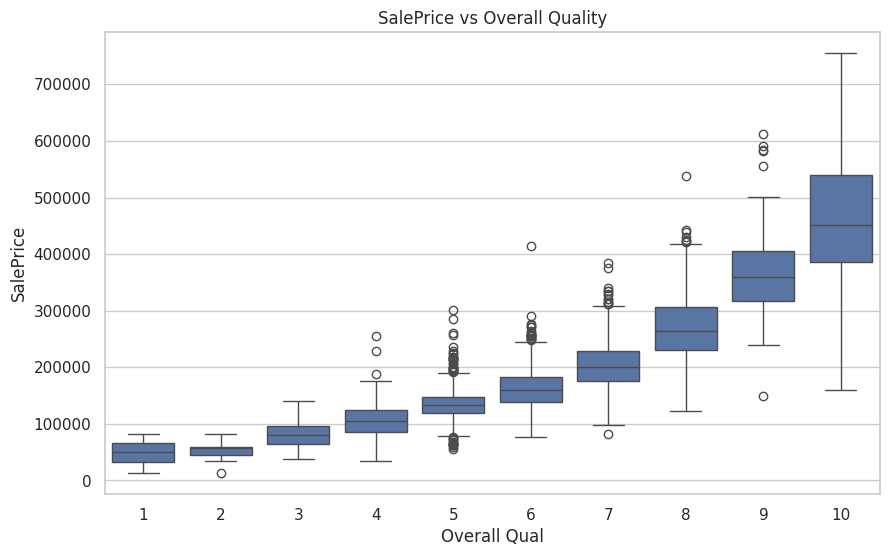

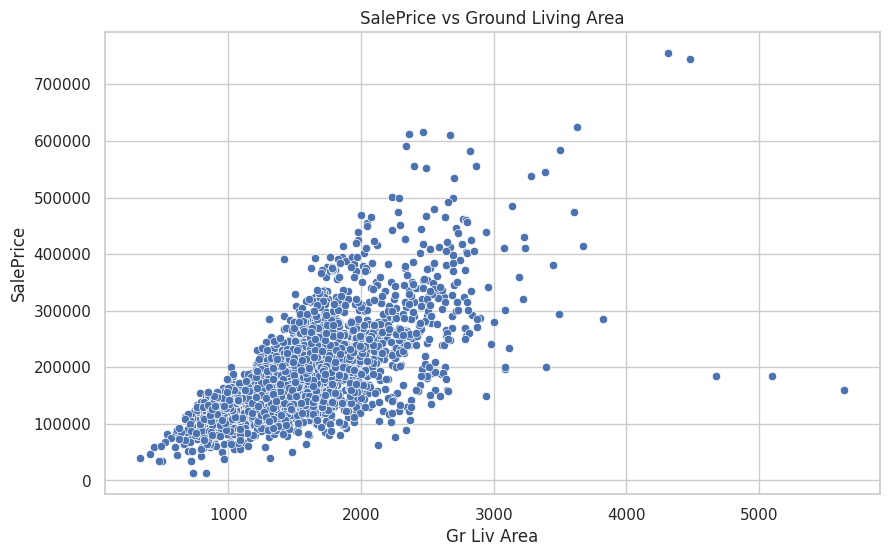

In [5]:
# Overall Quality vs Sale price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)
plt.title('SalePrice vs Overall Quality')
plt.show()

# Ground Living Area vs Sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title('SalePrice vs Ground Living Area')
plt.show()
